# 7.2 词云图绘制——wordcloud库

企业可以使用数据可视化（如图表、图形和信息图）来传达一目了然的基本信息，但如果你的原始数据是基于文本的呢？

字云是一种引人注目的可视化方法，可以突出重要的文本数据点。它可以使沉闷的数据闪闪发光，快速传递关键信息。作为一种视觉表现形式。它是一组以不同大小显示的词：该词越大、越粗，它在文件中出现的频率越高，越重要。文本云包括数据可视化、文本数据、字体颜色、词频分析和特定的单词图形。

<center><img src="image/What-is-word-cloud.png" alt="image/What-is-word-cloud.png" width="304" height="228"></center>

通过观察图片，我们可以清楚地看到，这个词云是关于冠状病毒大流行的，因为 "冠状病毒"、"covid19 "和 "病毒 "是最常见的词汇。我们还可以看到，这是一个全球性的问题，它强调了个人防护设备和疫苗管理的重要性。

## 1. 安装wordcloud库

如果使用pip安装工具，在终端Terminal里的命令行模式下，输入以下命令：
```bash
pip install wordcloud
```

In [1]:
import wordcloud
wordcloud.__version__

'1.9.2'

## 2. 绘制一个简单的词云图

首先，应用worldcloud生成词云图片对象

In [2]:
from wordcloud import WordCloud
text = "Circle"
wc = WordCloud(background_color="white", repeat=True,
               width=400,
               height=200)
wc.generate(text)

接着，应用matplotlib库，呈现该图片对象

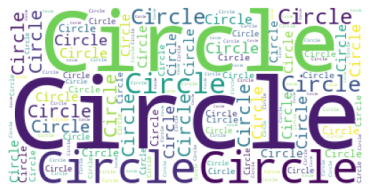

In [3]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

plt.imshow(wc)
plt.axis("off")
plt.show()

### 练习
观察上图，如果自定义，或者是自己设计一个词云图，考虑设计哪些特性？
1. xxx
2. xxx
3. xxx

## 3. 增加更多的参数

wordcloud库的WordCloud类有以下参数可选：

```python
wordcloud.WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
```

|参数|参数类型|解释|
|---|---|---|
|font_path|string|将被使用的字体的路径（OTF或TTF）|
|width|int|默认400，画布的宽度|
|height|int|默认200，画布的高度|
|mask|nd-array|如果不是 "无"，则给出一个二进制掩码，用于绘制文字的位置。如果掩码不是无，宽度和高度将被忽略，而将使用掩码的形状。所有白色（#FF或#FFFFFF）条目将被视为 "屏蔽"，而其他条目可以自由绘制|
|scale|float|默认为1，计算和绘图之间的比例。对于大的词云图像，使用比例而不是更大的画布尺寸，明显更快，但可能会导致对单词的粗略拟合|
|min_font_size|int|默认为4，使用最小的字体大小。当这个尺寸没有更多的空间时就会停止|
|max_font_size|int|最大的字的最大字体大小。如果没有，则使用图像的高度|
|max_words|int|默认200，最大单词数量|
|background_color|color vlaue|默认为黑色，词云图像的背景颜色|
|mode|string|默认为'RGB'，当模式为 "RGBA "且background_color为None时，将生成透明的背景|
|repeat|bool|默认为False，是否重复单词和短语，直到达到max_words或min_font_size|



## 4. 绘制一条新闻报道的词云

我们来看下一条新闻报道：“RMB internationalization gets more attention”
> RMB internationalization gets more attention  
By ZHOU LANXU | China Daily | Updated: 2022-12-28 10:05  
Travelers exchange currency in front of a bank counter at Incheon International Airport in Incheon, South Korea, in September. 
BLOOMBERG Amid the negative spillovers of the United States' sharpest monetary tightening in decades, calls for shifting toward a multipolar international currency system have gained more attention this year — and so has the role of the renminbi in the transformation.  
Although the renminbi felt depreciation pressure brought by a strong greenback as much as other non-dollar currencies did, the Chinese currency has still undoubtedly experienced a rise in its global profile over the past year.


### 4.1 读取新闻文本文件


将新闻文本保存在TXT(.txt)文件里，然后使用以下语句读取：

In [5]:
f = open('datasets/news_sample02.txt', 'r', encoding='utf-8')
text = f.read()
text = text.replace('\n', ' ')  #删除换行符

### 4.2 准备一个白底的图形

在网上下载图片，例如在搜索引擎上搜索“人民币+图标+白底”:  
<img src="image/rmb.png" alt="image/rmb.png" width="150">  
使用修改的图片的软件修改图片大小，在保证宽*高比不变的情况下，宽改成1500pixels，避免图片过大或者过小。

读取准备好的图形，作为掩码的形状。然后使用PIL库来读取图片。

In [6]:
from PIL import Image
import numpy as np

image = Image.open('image/rmb.png')
image_size = image.size
mask_img = np.array(image)
print('图片大小：', image_size)

图片大小： (1500, 1500)


### 4.3 选择颜色

以CSS颜色为例，

<img src="image/sphx_glr_named_colors_003.png" alt="image/sphx_glr_named_colors_003.png" width="600">  

选择一个色系，例如'purple',

In [7]:
from wordcloud import get_single_color_func
color_func = get_single_color_func('purple')

### 4.3 生成词云
接着，生成词云。

In [8]:
from wordcloud import WordCloud
wc = WordCloud(mask=mask_img,
              max_words=200,
              max_font_size=80,
              min_font_size=25,
              width=1500,
              height=1500,
              background_color="white", 
               color_func=color_func,
              repeat=True)
wc.generate(text)

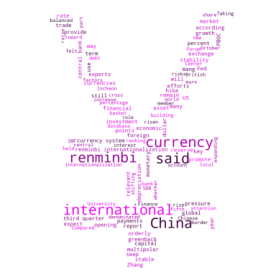

In [9]:
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
plt.savefig("image/ciyun_en.jpg", dpi=500) # 或者保存成.png .svg .pdf .eps等
plt.show()

### 练习
1. 检索并保存一个较长的文本
2. 在bing.com搜索引擎上，输入“符号 白底”等关键词
2. 制作相应的词云图

## 附录
[1] wordcloud文档: <http://amueller.github.io/word_cloud/>  
[2] wordcloud的API Reference:<http://amueller.github.io/word_cloud/references.html>  
[3] imageio:<https://imageio.readthedocs.io/en/latest/index.html>